## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784')

In [7]:
# mnist

In [8]:
x,y = mnist['data'],mnist['target']

In [9]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [1]:
#x[0]

In [12]:
x.shape

(70000, 784)

In [13]:
y.shape

(70000,)

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [19]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28) # lets reshape it to plot it

In [18]:
#plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")

(-0.5, 27.5, 27.5, -0.5)

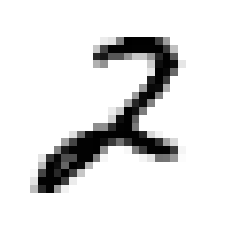

In [20]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")
plt.axis("off")

In [21]:
y[36001]

'2'

In [22]:
x_train, x_test = x[0:60000],x[60000:] 

In [23]:
y_train, y_test = y[0:60000],y[60000:] 

In [24]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index],y_train[shuffle_index]

## Creating a 2 detector

In [32]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2  = (y_test ==2)

In [34]:
y_train_2

array([ True,  True, False, ..., False, False, False])

In [35]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [36]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression(tol = 0.1)

In [40]:
clf.fit(x_train,y_train_2)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [41]:
clf.predict([some_digit])

array([ True])

In [45]:
# made 3,3 cross validation set ,one test other train continue

from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
a.mean()

0.9779333333333334